# Demonstração da Nova Estrutura de ML

Este notebook demonstra como usar a estrutura refatorada que separa claramente:
- **Preparação dos dados** (DataProcessor)
- **Treinamento do modelo** (ModelTrainer)
- **Predição** (MoviePredictor)

## Vantagens da nova estrutura:
1. **Separação de responsabilidades**: Cada classe tem uma função específica
2. **Reutilização**: Processor e modelo podem ser salvos e reutilizados
3. **Consistência**: Mesmas transformações no treino e predição
4. **Escalabilidade**: Fácil adicionar novas features ou modelos
5. **Testabilidade**: Cada componente pode ser testado separadamente

## 1. Carregando os Componentes Treinados

In [1]:
# Importar as classes da nova estrutura
import sys
sys.path.append('scripts')

from scripts.data_processor import DataProcessor
from scripts.train_model import ModelTrainer
from scripts.predict import MoviePredictor
import pandas as pd
import numpy as np

In [2]:
# Verificar se os arquivos do modelo existem
from pathlib import Path

model_path = "models/rf_model.pkl"
processor_path = "models/data_processor.pkl"

print(f"Modelo existe: {Path(model_path).exists()}")
print(f"Processor existe: {Path(processor_path).exists()}")

if not Path(model_path).exists():
    print("\n⚠️ Execute primeiro: python scripts/train_model_v2.py --db data/production.db")

Modelo existe: True
Processor existe: True


In [3]:
# Carregar o preditor (que carrega modelo e processor automaticamente)
predictor = MoviePredictor(model_path, processor_path)

print(f"✅ Sistema carregado com sucesso!")
print(f"📊 Features utilizadas: {len(predictor.model_trainer.feature_names)}")

Modelo carregado de: models/rf_model.pkl
Processor carregado de: models/data_processor.pkl
Features do modelo: 16
✅ Sistema carregado com sucesso!
📊 Features utilizadas: 16


## 2. Testando Predições com Diferentes Filmes

In [4]:
# Filme 1: The Shawshank Redemption (Clássico aclamado)
shawshank = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28341469'
}

print("🎬 THE SHAWSHANK REDEMPTION")
print("=" * 40)
prediction = predictor.explain_prediction(shawshank, top_features=5)
print(f"\n🌟 Rating IMDB real: 9.3")
print(f"🎯 Erro absoluto: {abs(9.3 - prediction):.2f}")

🎬 THE SHAWSHANK REDEMPTION

Predição: 8.76

Top 5 features mais importantes:
--------------------------------------------------
1. No_of_Votes         : 2343110.00 (imp: 0.2379)
2. Log_Votes           : 14.67      (imp: 0.2326)
3. Meta_score_filled   : 80.00      (imp: 0.1447)
4. Released_Year       : 1994.00    (imp: 0.0841)
5. Log_Gross           : 17.16      (imp: 0.0816)

🌟 Rating IMDB real: 9.3
🎯 Erro absoluto: 0.54


In [27]:
# Filme 2: Avengers Endgame (Blockbuster recente)
avengers = {
    'Series_Title': 'Avengers: Endgame',
    'Released_Year': 2019,
    'Certificate': 'PG-13',
    'Runtime': '181 min',
    'Genre': 'Action,Adventure,Drama',
    'Overview': 'After the devastating events of Infinity War.',
    'Meta_score': 78.0,
    'Director': 'Anthony Russo',
    'Star1': 'Robert Downey Jr.',
    'Star2': 'Chris Evans',
    'Star3': 'Mark Ruffalo',
    'Star4': 'Chris Hemsworth',
    'No_of_Votes': 987654,
    'Gross': '858373000'
}

print("\n🎬 AVENGERS: ENDGAME")
print("=" * 40)
prediction_avengers = predictor.explain_prediction(avengers, top_features=5)
print(f"\n🌟 Rating IMDB real: 8.4")
print(f"🎯 Erro absoluto: {abs(8.4 - prediction_avengers):.2f}")


🎬 AVENGERS: ENDGAME

Predição: 8.15

Top 5 features mais importantes:
--------------------------------------------------
1. No_of_Votes         : 987654.00  (imp: 0.2379)
2. Log_Votes           : 13.80      (imp: 0.2326)
3. Meta_score_filled   : 78.00      (imp: 0.1447)
4. Released_Year       : 2019.00    (imp: 0.0841)
5. Log_Gross           : 20.57      (imp: 0.0816)

🌟 Rating IMDB real: 8.4
🎯 Erro absoluto: 0.25


In [38]:
# Filme 3: Filme hipotético de baixo orçamento
indie_film = {
    'Series_Title': 'Indie Drama',
    'Released_Year': 2020,
    'Certificate': 'R',
    'Runtime': '95 min',
    'Genre': 'Drama',
    'Overview': 'A small indie drama.',
    'Meta_score': 65.0,
    'Director': 'Unknown Director',
    'Star1': 'Unknown Actor 1',
    'Star2': 'Unknown Actor 2',
    'Star3': 'Unknown Actor 3',
    'Star4': 'Unknown Actor 4',
    'No_of_Votes': 1500,  # Poucos votos
    'Gross': '150000'     # Baixa bilheteria
}

print("\n🎬 INDIE DRAMA (Filme hipotético)")
print("=" * 40)
prediction_indie = predictor.explain_prediction(indie_film, top_features=5)
print(f"\n💭 Este seria um filme independente com características de baixo orçamento")


🎬 INDIE DRAMA (Filme hipotético)

Predição: 7.80

Top 5 features mais importantes:
--------------------------------------------------
1. No_of_Votes         : 1500.00    (imp: 0.2379)
2. Log_Votes           : 7.31       (imp: 0.2326)
3. Meta_score_filled   : 65.00      (imp: 0.1447)
4. Released_Year       : 2020.00    (imp: 0.0841)
5. Log_Gross           : 11.92      (imp: 0.0816)

💭 Este seria um filme independente com características de baixo orçamento


## 3. Predição em Lote

In [33]:
# Criar DataFrame com múltiplos filmes
movies_batch = pd.DataFrame([
    shawshank,
    avengers,
    indie_film
])

print("🎬 PREDIÇÃO EM LOTE")
print("=" * 50)

# Fazer predições em lote
batch_predictions = predictor.predict_batch(movies_batch)

# Mostrar resultados
results = pd.DataFrame({
    'Filme': movies_batch['Series_Title'],
    'Ano': movies_batch['Released_Year'],
    'Votos': movies_batch['No_of_Votes'],
    'Rating_Predito': batch_predictions.round(2)
})

print(results.to_string(index=False))

🎬 PREDIÇÃO EM LOTE
                   Filme  Ano   Votos  Rating_Predito
The Shawshank Redemption 1994 2343110            8.76
       Avengers: Endgame 2019  987654            8.15
             Indie Drama 2020    1500            7.80


## 4. Análise das Features Mais Importantes

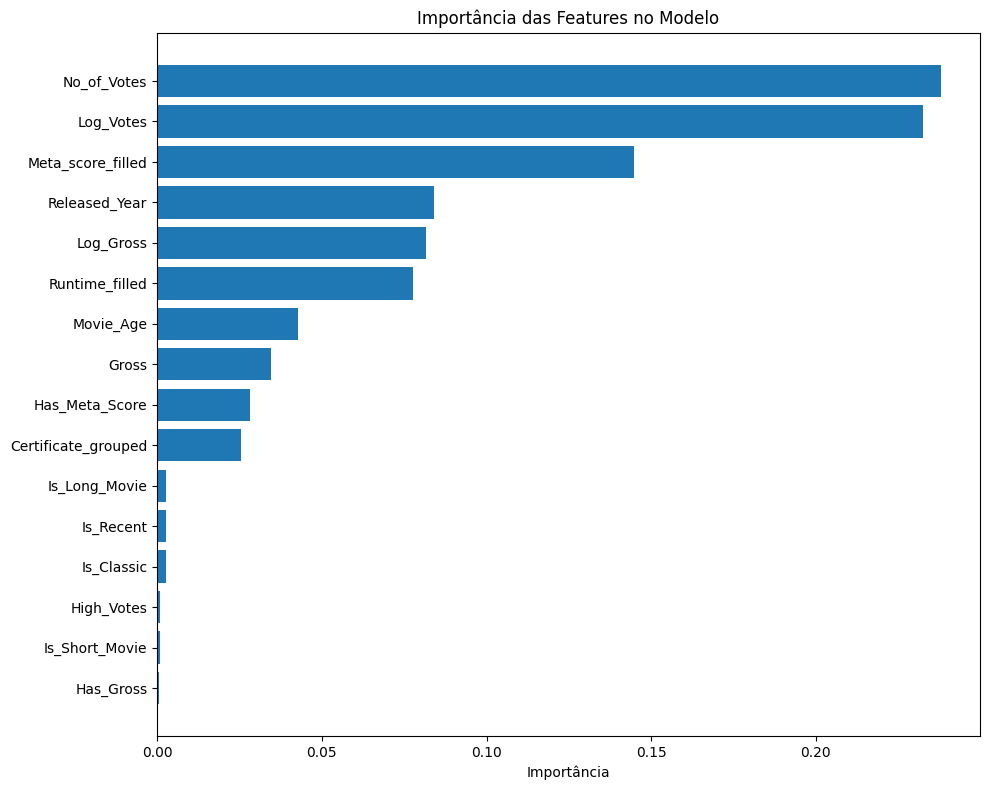

📊 TOP 10 FEATURES MAIS IMPORTANTES:
 1. Certificate_grouped : 0.0253
 2. Has_Meta_Score      : 0.0281
 3. Gross               : 0.0347
 4. Movie_Age           : 0.0428
 5. Runtime_filled      : 0.0777
 6. Log_Gross           : 0.0816
 7. Released_Year       : 0.0841
 8. Meta_score_filled   : 0.1447
 9. Log_Votes           : 0.2326
10. No_of_Votes         : 0.2379


In [34]:
# Obter importâncias das features do modelo
import matplotlib.pyplot as plt

if hasattr(predictor.model_trainer.model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': predictor.model_trainer.feature_names,
        'importance': predictor.model_trainer.model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    # Plot das importâncias
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Importância das Features no Modelo')
    plt.xlabel('Importância')
    plt.tight_layout()
    plt.show()
    
    print("📊 TOP 10 FEATURES MAIS IMPORTANTES:")
    print("=" * 50)
    for i, (_, row) in enumerate(feature_importance.tail(10).iterrows()):
        print(f"{i+1:2d}. {row['feature']:<20}: {row['importance']:.4f}")
else:
    print("⚠️ Modelo não tem informações de importância das features")

## 5. Demonstração: Como Usar para Novos Dados

Esta seção mostra como usar a estrutura em um cenário real.

In [35]:
def avaliar_filme_novo(dados_filme):
    """
    Função para avaliar um filme novo usando a estrutura criada.
    """
    print(f"🎬 Avaliando: {dados_filme['Series_Title']}")
    print("-" * 50)
    
    # Fazer predição
    rating_predito = predictor.predict_single(dados_filme)
    
    # Classificar o filme
    if rating_predito >= 8.0:
        categoria = "🌟 EXCELENTE"
    elif rating_predito >= 7.0:
        categoria = "👍 BOM"
    elif rating_predito >= 6.0:
        categoria = "😐 MEDIANO"
    else:
        categoria = "👎 FRACO"
    
    print(f"Rating Predito: {rating_predito:.2f}")
    print(f"Categoria: {categoria}")
    
    return rating_predito

# Teste com um filme fictício
filme_teste = {
    'Series_Title': 'Meu Filme Teste',
    'Released_Year': 2023,
    'Certificate': 'PG-13',
    'Runtime': '120 min',
    'Genre': 'Action,Drama',
    'Overview': 'Um filme de teste.',
    'Meta_score': 75.0,
    'Director': 'Diretor Teste',
    'Star1': 'Ator 1',
    'Star2': 'Ator 2',
    'Star3': 'Ator 3',
    'Star4': 'Ator 4',
    'No_of_Votes': 50000,
    'Gross': '5000000'
}

avaliar_filme_novo(filme_teste)

🎬 Avaliando: Meu Filme Teste
--------------------------------------------------
Rating Predito: 7.92
Categoria: 👍 BOM


np.float64(7.921661084656086)

## 6. Resumo da Nova Estrutura

### ✅ Vantagens Alcançadas:

1. **Separação Clara de Responsabilidades**:
   - `DataProcessor`: Limpeza, feature engineering, transformações
   - `ModelTrainer`: Treinamento, avaliação, serialização do modelo
   - `MoviePredictor`: Interface para predições

2. **Reutilização e Consistência**:
   - Mesmo processor usado no treino e predição
   - Transformações salvas e reutilizáveis

3. **Facilidade de Manutenção**:
   - Adicionar novas features: apenas no `DataProcessor`
   - Testar novos modelos: apenas no `ModelTrainer`
   - Mudanças isoladas não afetam outros componentes

4. **Escalabilidade**:
   - Fácil adicionar novos tipos de modelo
   - Pipeline flexível para diferentes datasets
   - Predições em lote ou individuais

### 📁 Estrutura de Arquivos:
```
scripts/
├── data_processor.py      # Preparação dos dados
├── train_model_v2.py      # Treinamento do modelo
├── predict.py             # Interface de predição
├── preprocess.py          # Limpeza básica (reutilizada)
└── train_model.py         # Versão antiga (deprecated)

models/
├── rf_model.pkl           # Modelo treinado
└── data_processor.pkl     # Processor configurado
```

### 🚀 Como Usar em Produção:
```python
# Carregar uma vez
predictor = MoviePredictor('models/rf_model.pkl', 'models/data_processor.pkl')

# Usar para múltiplas predições
rating = predictor.predict_single(dados_filme)
```